# NBA Players stats since 1950

## Content

The data-set contains aggregate individual statistics for 67 NBA seasons; from basic box-score attributes such as points, assists, rebounds etc., to more advanced money-ball like features such as Value Over Replacement.

The data was scraped from Basketball-reference and found in Kaggle: 
https://www.kaggle.com/drgilermo/nba-players-stats

## Introduction

Thanks to a Data Exploratory, many different aspects from the dataset will be uncovered such as:
- the top scorers of NBA History
- the evolution of the aspect of the NBA game.
- the evolution of the different positions.
- the debate about the best player of All Time.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
%matplotlib inline
import seaborn as sns

## The Data

In [2]:
# INFO FROM PLAYERS
players_info = pd.read_csv("data/player_data.csv")

# PLAYER STATS PER SEASON
players_season_stats = pd.read_csv("data/Seasons_Stats.csv")

players_info.shape, players_season_stats.shape

((4550, 8), (24691, 53))

In [3]:
players_info.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [4]:
players_season_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


### The info regarding the Players

In [5]:
def ft_inch_to_cm(ft_inch_str):
    '''
    This function converts feet and inches (str) into cms (int).
    Args:
        ft_inch_str: feet-inch (str).
    Returns:
        h_cm: height in cms (int).
        
    '''
    try:
        # GET FEET VALUE
        h_ft = int(ft_inch_str.split('-')[0])
        # GET INCH VALUE
        h_inch = int(ft_inch_str.split('-')[1])
    
        h_inch += h_ft * 12
    
        # RETURN HEIGHT IN CM
        h_cm = round(h_inch * 2.54)
    except:
        h_cm = 0
    return int(h_cm)

def lbs_to_kg(lbs):
    '''
    This function converts lbs (float) into kg (int).
    Args:
        lbs: the weight in pounds (float)
    Returns:
        kg: the weight in kg (int)
    '''
    try:
        kg = round(lbs / 2.2)
    except:
        kg = 0
    return int(kg)

def get_year_from_birth(birth_date_str):
    '''
    This function gets the year from a birth year (str).
    Args:
        birth_date_str: birth date of the player (str).
    Returns:
        year: the birth year of the player (int)
    '''
    try:
        year = int(birth_date_str.split(', ')[1])
    except:
        year = 0
    return int(year)

def get_positions(position_str, idx_pos):
    '''
    This function returns the first or the second position of the player,
    depending on idx_pos value.
    Args: 
        position_str: the position(s) of the player (str).
    Returns:
        position_idx: first / second position of the player (str).
    '''
    try:
        if idx_pos < 1:
            position_idx = position_str.split('-')[0]
        else:
            try:
                position_idx = position_str.split('-')[1]
            except:
                position_idx = 'No'
    except:
        position_idx = 'No'
    return str(position_idx)
    

In [6]:
# CLEANING THE PLAYER INFO DATA

# CONVERTING / GETTING INFO FROM COLUMNS
players_info['height'] = players_info['height'].apply(ft_inch_to_cm)
players_info['weight'] = players_info['weight'].apply(lbs_to_kg)
players_info['birth_date'] = players_info['birth_date'].apply(get_year_from_birth)
players_info['position_1'] = players_info['position'].apply(lambda x: get_positions(x,0))
players_info['position_2'] = players_info['position'].apply(lambda x: get_positions(x,1))

# DROPPING COLUMNS / ROWS
players_info = players_info.drop(['position'],axis=1)

# DROPPING DUPLICATES
players_info = players_info.drop_duplicates()

In [7]:
players_info.head()

,name,year_start,year_end,height,weight,birth_date,college,position_1,position_2
0,Alaa Abdelnaby,1991,1995,208,109,1968,Duke University,F,C
1,Zaid Abdul-Aziz,1969,1978,206,107,1946,Iowa State University,C,F
2,Kareem Abdul-Jabbar,1970,1989,218,102,1947,"University of California, Los Angeles",C,No
3,Mahmoud Abdul-Rauf,1991,2001,185,74,1969,Louisiana State University,G,No
4,Tariq Abdul-Wahad,1998,2003,198,101,1974,San Jose State University,F,No


In [8]:
def get_percent_missing_values_feature(df):
    '''
    this function returns the percentage of missing value for a specific variable.
    This order of feature is sorted.
    Args:
        df: the corresponding dataframe and its features analyzed.
    Returns:
        /
    '''
    missing = {}
    for feat in df.columns:
        missing_values = len(df[df[feat].isnull()])
        total_length = len(df[feat])
        percent = round(100 * missing_values/total_length,2)
        missing[feat] = percent
        
    sort_missing = sorted(missing.items(), key=lambda x: x[1], reverse=True)

    for feat in sort_missing:
        print("[Feature '{}'] percentage missing values: {}% ({}/{})\n".format(feat[0], feat[1] , len(df[df[feat[0]].isnull()]), len(df[feat[0]]) ))
    
    del missing,sort_missing

In [9]:
# PERCENTAGE OF MISSING CONTENT PER VARIABLE
get_percent_missing_values_feature(players_info)

[Feature 'college'] percentage missing values: 6.64% (302/4550)

[Feature 'name'] percentage missing values: 0.0% (0/4550)

[Feature 'year_start'] percentage missing values: 0.0% (0/4550)

[Feature 'year_end'] percentage missing values: 0.0% (0/4550)

[Feature 'height'] percentage missing values: 0.0% (0/4550)

[Feature 'weight'] percentage missing values: 0.0% (0/4550)

[Feature 'birth_date'] percentage missing values: 0.0% (0/4550)

[Feature 'position_1'] percentage missing values: 0.0% (0/4550)

[Feature 'position_2'] percentage missing values: 0.0% (0/4550)



Some players do not have a college, these will be dropped.

In [10]:
# DROPPING ROWS WHERE 'COLLEGE' IS NAN
players_info = players_info.dropna(subset=['college'])

In [11]:
print("Players info considered: {}".format(players_info.shape[0]))

Players info considered: 4248


### The stats of the Players per season

Regarding the stats per season, if there is no year given, there is no point to keep the row.

In [12]:
players_season_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [13]:
# DATAFRAME INFO
players_season_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
Unnamed: 0    24691 non-null int64
Year          24624 non-null float64
Player        24624 non-null object
Pos           24624 non-null object
Age           24616 non-null float64
Tm            24624 non-null object
G             24624 non-null float64
GS            18233 non-null float64
MP            24138 non-null float64
PER           24101 non-null float64
TS%           24538 non-null float64
3PAr          18839 non-null float64
FTr           24525 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
blanl         0 non-null float64
OWS           24585 non-null float64
DWS           24585 non-null float64
WS          

In [14]:
# PERCENTAGE OF MISSING CONTENT PER VARIABLE
get_percent_missing_values_feature(players_season_stats)

[Feature 'blanl'] percentage missing values: 100.0% (24691/24691)

[Feature 'blank2'] percentage missing values: 100.0% (24691/24691)

[Feature '3P%'] percentage missing values: 37.56% (9275/24691)

[Feature 'GS'] percentage missing values: 26.16% (6458/24691)

[Feature '3PAr'] percentage missing values: 23.7% (5852/24691)

[Feature '3P'] percentage missing values: 23.34% (5764/24691)

[Feature '3PA'] percentage missing values: 23.34% (5764/24691)

[Feature 'TOV%'] percentage missing values: 20.69% (5109/24691)

[Feature 'USG%'] percentage missing values: 20.46% (5051/24691)

[Feature 'TOV'] percentage missing values: 20.44% (5046/24691)

[Feature 'ORB%'] percentage missing values: 15.79% (3899/24691)

[Feature 'DRB%'] percentage missing values: 15.79% (3899/24691)

[Feature 'STL%'] percentage missing values: 15.79% (3899/24691)

[Feature 'BLK%'] percentage missing values: 15.79% (3899/24691)

[Feature 'OBPM'] percentage missing values: 15.77% (3894/24691)

[Feature 'DBPM'] percentage 

In [15]:
# LISTING OF POSITIONS
players_season_stats['Pos'].value_counts()

PF       4966
SG       4811
C        4759
SF       4699
PG       4648
G         139
F         123
F-C        81
G-F        79
F-G        60
C-F        35
C-PF       33
SF-SG      30
PG-SG      28
SG-PG      27
PF-C       27
SG-SF      26
PF-SF      25
SF-PF      21
SG-PF       3
C-SF        2
PG-SF       1
SF-PG       1
Name: Pos, dtype: int64

- many players have 2 positions.
- the Guard position could correspond to a Shooting Guard (SG) and to a Point Guard (PG).
- the Forward position could correspond to a Small Forward (SF) and to a Power Forward (PF).
- the F-C / C-F positions correspond to a Power Forward - Center (most of the time).
- the F-G / G-F positions correspond to a Small Forward - Shooting Guard (most of the time).

In [16]:
# DROPPING STATS WITH NO YEAR

players_season_stats = players_season_stats.dropna(subset=['Year'])
players_season_stats.Year = players_season_stats.Year.astype('int')

# SPLITTING POS INTO POS_1 AND POS_2
players_season_stats.loc[players_season_stats[players_season_stats['Pos'] == 'G'].index,'Pos'] = 'SG-PG'
players_season_stats.loc[players_season_stats[players_season_stats['Pos'] == 'F'].index,'Pos'] = 'SF-PF'
players_season_stats.loc[players_season_stats[players_season_stats['Pos'] == 'F-C'].index,'Pos'] = 'PF-C'
players_season_stats.loc[players_season_stats[players_season_stats['Pos'] == 'C-F'].index,'Pos'] = 'C-PF'
players_season_stats.loc[players_season_stats[players_season_stats['Pos'] == 'G-F'].index,'Pos'] = 'SG-SF'
players_season_stats.loc[players_season_stats[players_season_stats['Pos'] == 'F-G'].index,'Pos'] = 'SF-SG'
players_season_stats['Pos_1'] = players_season_stats['Pos'].apply(lambda x: get_positions(x,0))
players_season_stats['Pos_2'] = players_season_stats['Pos'].apply(lambda x: get_positions(x,1))

# DROPPING COLUMNS WITH ONLY NAN VALUES
players_season_stats = players_season_stats.drop(['Pos','Unnamed: 0','blanl','blank2'],axis=1)

We should be also able to find a age for our players analyzed. But as the NBA remained quite young in the 1950s, it might be possible that some players do not have data entered in those years. 

In [17]:
# INITIAL YEAR WITH DATA ENTERED
print("Initial year where the data is stored: {}\n".format(players_season_stats['Year'].min()))

# NUMBER OF YEARS WHERE THIS IS NO AGE PROVIDED TO PLAYERS
df_no_age_data = players_season_stats[players_season_stats['Age'].isnull()]
years_without_data = df_no_age_data['Year']
print("Rows without an age entered: {}\n".format(len(df_no_age_data)))

# RANGE OF YEARS WITHOUT AGE GIVEN
print("Range of years without data stored: {}-{}".format(min(years_without_data), max(years_without_data)))

# DROPPING THESE PLAYERS
players_season_stats = players_season_stats.dropna(subset=['Age'])
players_season_stats.Age = players_season_stats.Age.astype('int')

Initial year where the data is stored: 1950

Rows without an age entered: 8

Range of years without data stored: 1953-1957


Some features remain empty because new detailed statistics came year after year.

In [18]:
# DEFINING A LIST OF THE STATISTICS FEATURES
stats_feats = [feat for feat in players_season_stats.columns if feat not in ['Year','Age','Player','Pos_1','Pos_2']]

# STORING FOR EACH STATISITC FEATURE ITS YEAR OF INTRODUCTION
impl_stats_dic = {}
for feat in stats_feats:
    start_year_feat = min(players_season_stats[~players_season_stats[feat].isnull()]['Year'])
    impl_stats_dic[feat] = start_year_feat

# SORTING BY YEAR OF INTRODUCTION OF THE FEATURE (TOP = MOST RECENT)
sort_impl_stats_dic = sorted(impl_stats_dic.items(), key=lambda x: x[1], reverse=True)

print("Year of the first data entry: {}\n".format(min(players_season_stats['Year'])))

for feat in sort_impl_stats_dic:
    print("The '{}' was introduced in: {}".format(feat[0],feat[1]))
    
del impl_stats_dic

Year of the first data entry: 1950

The 'GS' was introduced in: 1980
The '3PAr' was introduced in: 1980
The '3P' was introduced in: 1980
The '3PA' was introduced in: 1980
The '3P%' was introduced in: 1980
The 'TOV%' was introduced in: 1978
The 'USG%' was introduced in: 1978
The 'TOV' was introduced in: 1978
The 'ORB%' was introduced in: 1974
The 'DRB%' was introduced in: 1974
The 'STL%' was introduced in: 1974
The 'BLK%' was introduced in: 1974
The 'OBPM' was introduced in: 1974
The 'DBPM' was introduced in: 1974
The 'BPM' was introduced in: 1974
The 'VORP' was introduced in: 1974
The 'ORB' was introduced in: 1974
The 'DRB' was introduced in: 1974
The 'STL' was introduced in: 1974
The 'BLK' was introduced in: 1974
The 'TRB%' was introduced in: 1971
The 'AST%' was introduced in: 1965
The 'MP' was introduced in: 1952
The 'PER' was introduced in: 1952
The 'WS/48' was introduced in: 1952
The 'TRB' was introduced in: 1951
The 'Tm' was introduced in: 1950
The 'G' was introduced in: 1950
The 

As the first data entry was on 1950, if a statistic feature is introduced the same year and has missing content, these rows can be then dropped.

In [19]:
for feat in sort_impl_stats_dic:
    if feat[1] == 1950:
        print("Dropping NaN values from statistic feature: {}".format(feat[0]))
        print("Dropping {} rows...\n".format(len(players_season_stats[players_season_stats[feat[0]].isnull()])))
        players_season_stats = players_season_stats.dropna(subset=[feat[0]])

Dropping NaN values from statistic feature: Tm
Dropping 0 rows...

Dropping NaN values from statistic feature: G
Dropping 0 rows...

Dropping NaN values from statistic feature: TS%
Dropping 86 rows...

Dropping NaN values from statistic feature: FTr
Dropping 13 rows...

Dropping NaN values from statistic feature: OWS
Dropping 39 rows...

Dropping NaN values from statistic feature: DWS
Dropping 0 rows...

Dropping NaN values from statistic feature: WS
Dropping 0 rows...

Dropping NaN values from statistic feature: FG
Dropping 0 rows...

Dropping NaN values from statistic feature: FGA
Dropping 0 rows...

Dropping NaN values from statistic feature: FG%
Dropping 0 rows...

Dropping NaN values from statistic feature: 2P
Dropping 0 rows...

Dropping NaN values from statistic feature: 2PA
Dropping 0 rows...

Dropping NaN values from statistic feature: 2P%
Dropping 29 rows...

Dropping NaN values from statistic feature: eFG%
Dropping 0 rows...

Dropping NaN values from statistic feature: FT
Dr

In [20]:
# INTRODUCING THE NUMBER OF 'POINTS PER GAME'
players_season_stats['PPG'] = round(players_season_stats['PTS'] / players_season_stats['G'],1)

In [21]:
print("Statistics info considered: {}".format(players_season_stats.shape[0]))

Statistics info considered: 23697


## Data Exploratory

### The Global Trend of NBA

Here we are going to make observations on the Data.

Text(0.5, 1.0, 'Top 20 All-Time Points Per Game Scorers')

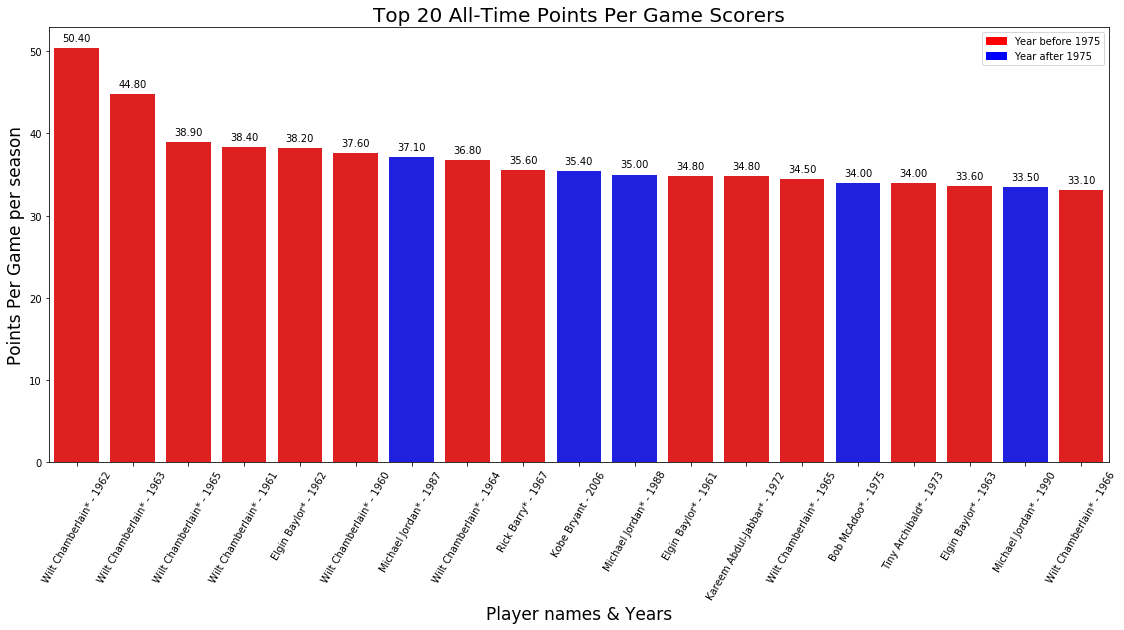

In [22]:
nb_top_scorers = 20

# TOP SCORERS ALL TIME ('PPG')
top_scorers = players_season_stats.sort_values('PPG', ascending=False)[:nb_top_scorers]

# TOP SCORERS NAMES
top_scorers_names = list(top_scorers['Player'].values)

# TOP SCORERS YEARS
top_scorers_years = list(top_scorers['Year'].values)

# TOP SCORERS NAMES LABELS
top_scorers_names_labels = [str(x) + ' - ' + str(y) for x, y in zip(top_scorers_names, top_scorers_years)]

# TOP SCORERS POINTS
top_scorers_ppg = list(top_scorers['PPG'].values)

plt.figure(figsize = (19,8))

# MAPPING OF COLORS FROM BARS
colors = []
for year in top_scorers_years:
    if year < 1975:
        colors.append('red')
    else:
        colors.append('blue')

# BARPLOT
g0 = sns.barplot(y=top_scorers_ppg, x=top_scorers_names_labels, estimator=max, ci=None, palette=colors)
g0.set_xticklabels(top_scorers_names_labels,rotation=60)
g0.set_xlabel('Player names & Years', size = 17)
g0.set_ylabel("Points Per Game per season", size = 17)

# ANNOTATING VALUES TO BARS
for p in g0.patches:
    g0.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# LEGEND PATCHES
legend_patches = [patches.Patch(color='red', label='Year before 1975'), patches.Patch(color='blue', label='Year after 1975')]
plt.legend(handles=legend_patches)

# PLOT TITLE
g0.set_title('Top ' + str(nb_top_scorers) + ' All-Time Points Per Game Scorers', size = 20)

From a top 20 all-time scorers of the NBA history, most of the players played before 1975. It could mean:
- the basketball before 1975 was quite new. Therefore, less strict rules were existing than today. It was easier to score.
- less players were playing before 1975. The concurrence was smaller. It left doors opened to a small number of players, dominating their time: Wilt Chamberlain (7 times in the top 20), Elgin Baylor (3 times). Having a 50.40 points per season compared to points from today is far beyond our imagination.
- from the players after 1975, Michael Jordan scored the most PPG; 3 times over 5 times.

In [23]:
def find_title_from_crit(crit):
    '''
    Get corresponding title (str) of the curve from a criteria (str).
    Args:
        crit: the criteria (str).
    Returns:
        title: the title corresponding to the criteria (str).
    '''
    if crit == 'FG%':
        title = 'Field Goal Percentage (%)'
    elif crit == 'eFG%':
        title = 'Effective Field Goal Percentage (%)'
    elif crit == '3P%':
        title = '3 Points Percentage (%)'
    elif crit == '2P%':
        title = '2 Points Percentage (%)'
    elif crit == '2PA':
        title = '2 Points-Attemps'
    elif crit == '3PA':
        title = '3 Points-Attemps'
    elif crit == 'BPM':
        title = 'Box Plus/Minus'
    elif crit == 'VORP':
        title = 'Value Over Replacement Player'
    elif crit == 'WS':
        title = 'Win Shares'
    elif crit == 'PER':
        title = 'Player Efficiency Rating'
    elif crit == 'DWS':
        title = 'Defensive Win Shares'
    elif crit == 'OWS':
        title = 'Offensive Win Shares'
    elif crit == 'TS%':
        title = 'True Shooting Percentages'
    elif crit == 'PPG':
        title = 'Points Per Game' 
    elif crit == 'MVP':
        title = 'Most Valuable Player' 
    elif crit == 'MVP_Finals':
        title = 'Most Valuable Player in NBA Finals' 
    elif crit == 'Finals':
        title = 'In NBA Finals' 
    elif crit == 'Titles':
        title = 'NBA Titles'
    elif crit == 'eTitle':
        title = 'Titles Won / Finals'
    elif crit == 'DPOY':
        title = 'Defensive Player Of The Year'
    elif crit == 'eAllStar':
        title = 'All-Star Selections / Career Years'
    else:
        title = 'je ne sais pas'
    return title

def get_annotation(x,y):
    '''
    This function is used to annotate points (str).
    Args:
        x,y: index, value used for annotation (str).
    Returns:
        annotation: annotation for the point (str).
    '''
    annotation = str(round(y,2)) 
    if '%' in crit:
        annotation += '%'
    annotation += ' (' + str(x) + ')'
    return annotation

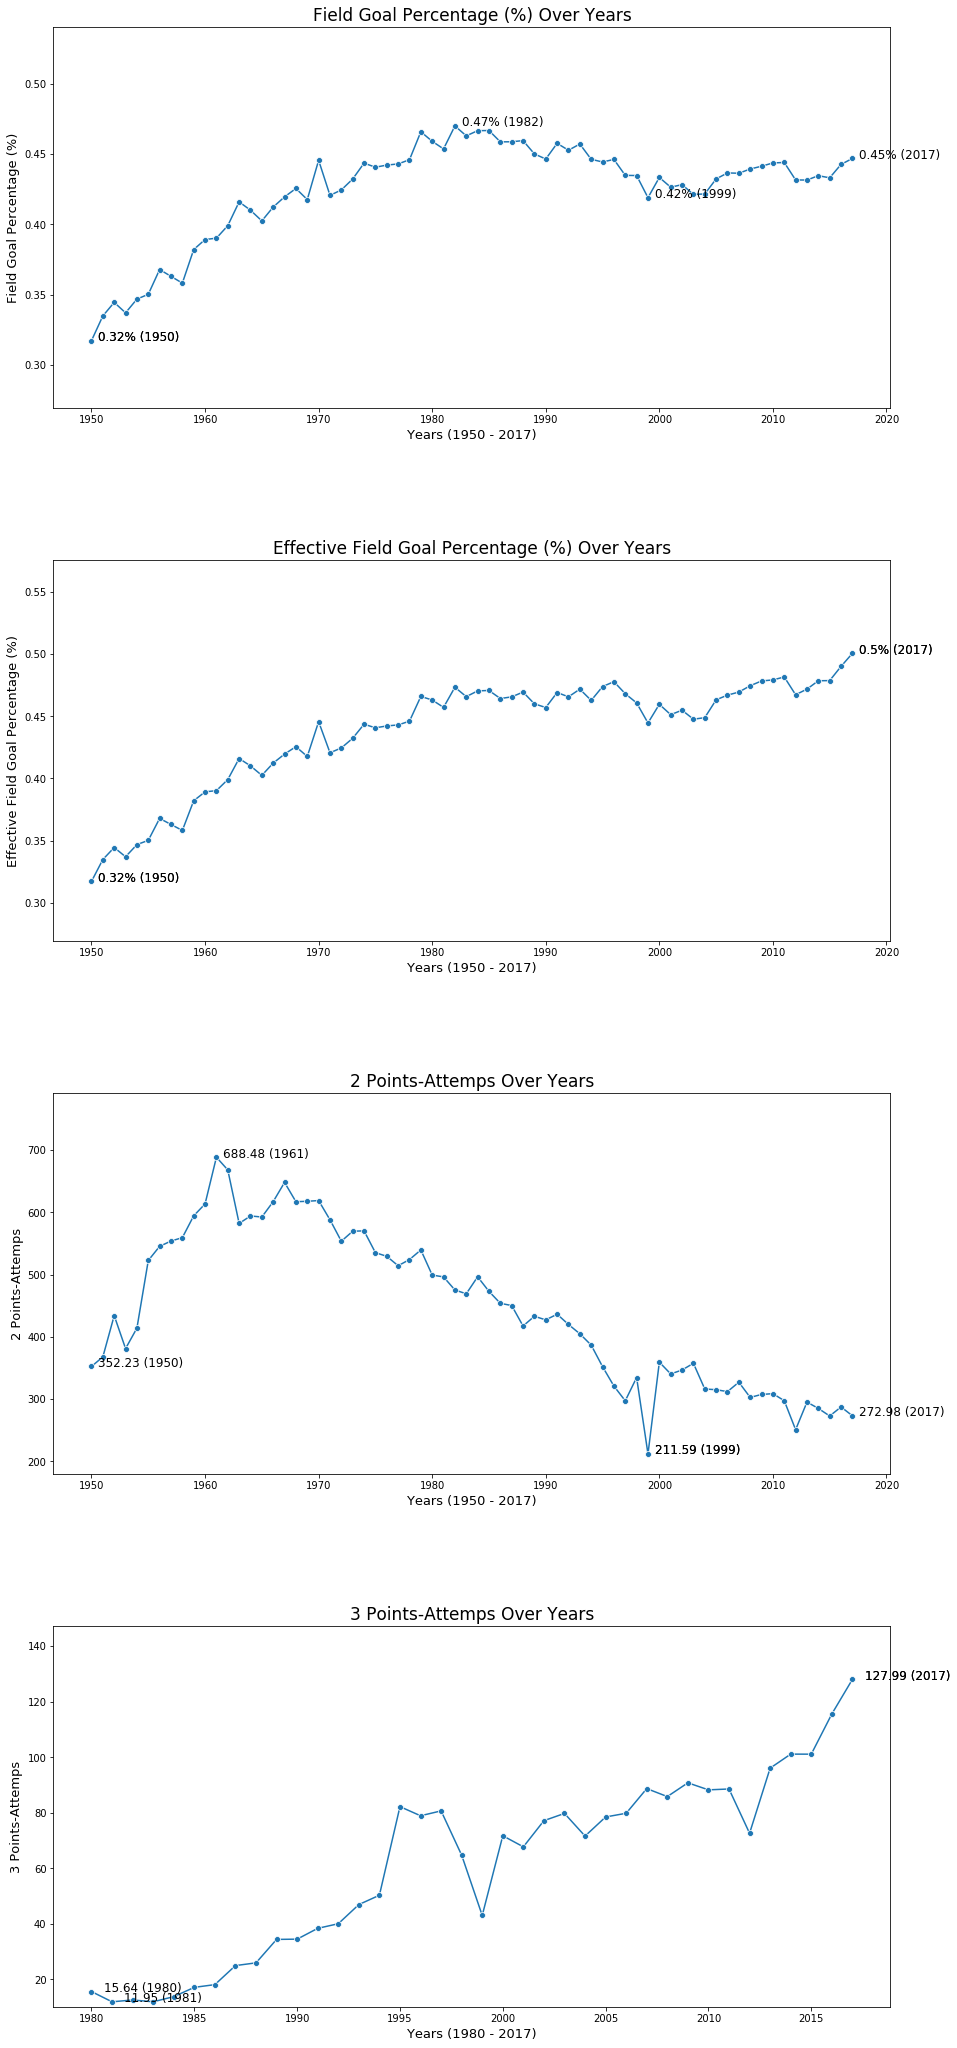

In [24]:
list_criteria = ['FG%', 'eFG%','2PA', '3PA']

fig, ax = plt.subplots(len(list_criteria), 1, figsize=(15,100))

# STATS GROUP PER YEAR AND TAKE MEAN VALUE PER STAT
stats_groupby_year = players_season_stats.groupby('Year').mean()

# LIST OF YEARS
stats_groupby_year_index = list(stats_groupby_year.index)

for idx,crit in enumerate(list_criteria): 
    #GETTING SPECIFIC POINTS
    x_first = stats_groupby_year[stats_groupby_year[crit].notna()].index[0]
    y_first = stats_groupby_year.loc[x_first,crit]
    x_min = stats_groupby_year[crit].idxmin()
    y_min = stats_groupby_year[crit].min()
    x_max = stats_groupby_year[crit].idxmax()
    y_max = stats_groupby_year[crit].max()
    try:
        x_min_2 = stats_groupby_year.loc[[x for x in stats_groupby_year_index if x > x_max]][crit].idxmin()
        y_min_2 = stats_groupby_year.loc[x_min_2,crit]
    except:
        x_min_2 = -1
        y_min_2 = -1
    x_last = stats_groupby_year[stats_groupby_year[crit].notna()].index[-1]
    y_last = stats_groupby_year.loc[x_last,crit]

    # LINEPLOT
    ax[idx] = sns.lineplot(y=crit, x=stats_groupby_year_index, data=stats_groupby_year, ax=ax[idx], marker="o", estimator='mean')
    ax[idx].set_xlabel('Years ('+ str(x_first) + ' - ' + str(x_last) + ')', size = 13)
    
    # ANNOTATING
    ax[idx].text(x=x_first+(0.03*x_first/100), y=y_first, s=get_annotation(x_first,y_first), size=12)
    ax[idx].text(x=x_min+(0.03*x_min/100), y=y_min, s=get_annotation(x_min,y_min), size=12)
    if x_min_2 != -1:
        ax[idx].text(x=x_min_2+(0.03*x_min_2/100), y=y_min_2, s=get_annotation(x_min_2,y_min_2), size=12)
    ax[idx].text(x=x_max+(0.03*x_max/100), y=y_max, s=get_annotation(x_max,y_max), size=12)
    ax[idx].text(x=x_last+(0.03*x_last/100), y=y_last, s=get_annotation(x_last,y_last), size=12)
    
    ax[idx].set_ylabel(find_title_from_crit(crit), size = 13)
    ax[idx].set_title(find_title_from_crit(crit) + ' Over Years', size = 17)
    
    # SET SPECIFIC PARAMETERS TO EACH LINEPLOT   
    ax[idx].set(ylim=[y_min-(15*y_min/100), y_max+(15*y_max/100)]) 

# PLOTTING POSITIONS
plt.subplots_adjust(hspace = 0.4,top = 0.4)

$eFG\% = \frac{\text{Field Goals (2 and 3 Points) + 0.5 * 3 Points}}{\text{Field Goals Attempts}} $

- from 1950 to 1982, the Field Goal Percentage as the Effective Field Goal Percentage drastically improved, from 0.32% to 0.45% / 0.50%. The NBA became little by little more selective with the people joining the Association, improving the global level. It changed from an "amateur" sport to a "professionnal".
- from 1950 to 1961, the game was about scoring close to the basket. The global trend of 2 points attempts decrease to make room for the 3-points shots. The NBA evoluates to a sport about shooting further.

In [25]:
pos_per_year_dict = {}
# STATS GROUP PER YEAR AND TAKE MEAN VALUE PER STAT
list_pos = list(players_season_stats['Pos_1'].value_counts().index)

for year in stats_groupby_year_index:
    counts_pos_1 = players_season_stats[players_season_stats['Year'] == year]['Pos_1'].value_counts()
    counts_pos_2 = players_season_stats[players_season_stats['Year'] == year]['Pos_2'].value_counts()
    pos_counts_dict = {}
    for pos in list_pos:
        pos_counts_dict[pos] = 0
        try:
            pos_counts_dict[pos] += counts_pos_1[pos]
        except:
            pass
        try:
            pos_counts_dict[pos] += counts_pos_2[pos]
        except:
            pass
        try:
            # CALCULING PROPORTION OF THE POS
            pos_counts_dict[pos] = round(100 * pos_counts_dict[pos] / (counts_pos_1.sum()+counts_pos_2.sum()-counts_pos_2['No']),2)
        except:
            pass
    pos_per_year_dict[year] = pos_counts_dict

pos_per_year = pd.DataFrame.from_dict(pos_per_year_dict, orient='index')

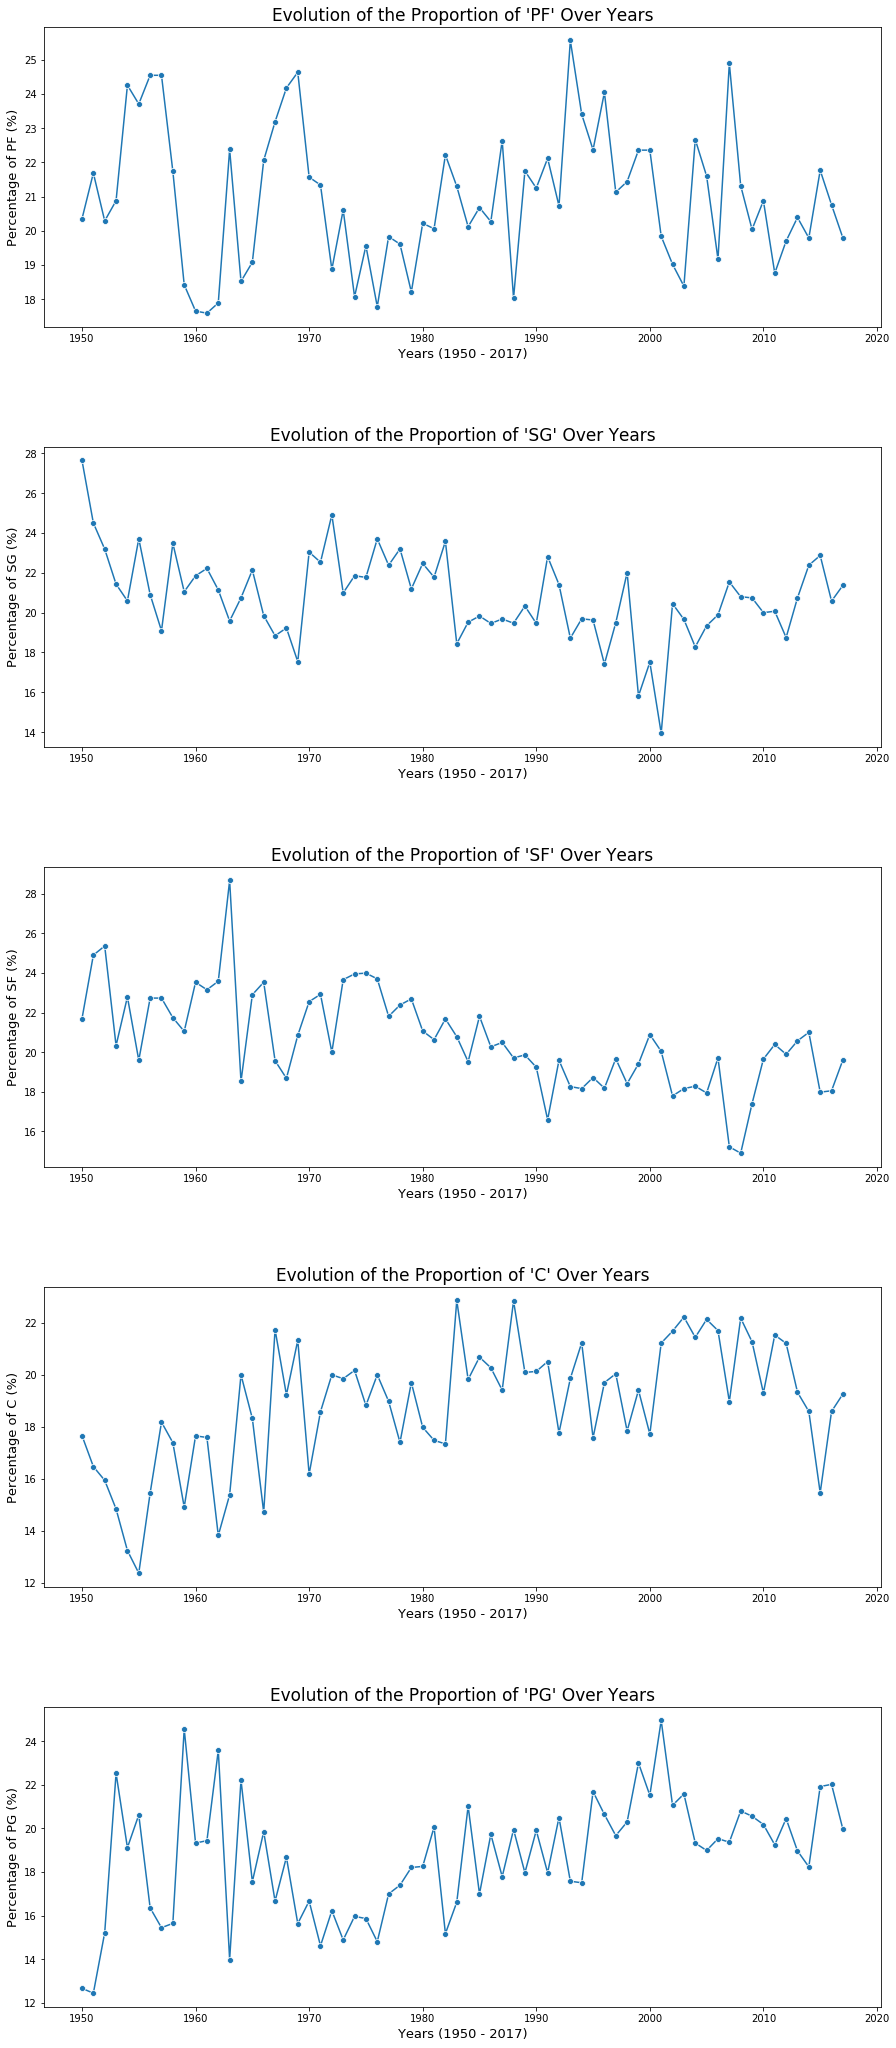

In [26]:
fig, ax = plt.subplots(len(list_pos), 1, figsize=(15,100))

for idx,pos in enumerate(list_pos): 

    # LINEPLOT
    ax[idx] = sns.lineplot(y=pos, x=pos_per_year.index, data=pos_per_year, ax=ax[idx], marker="o")
    ax[idx].set_xlabel('Years ('+ str(pos_per_year.index[0]) + ' - ' + str(pos_per_year.index[-1]) + ')', size = 13)
    ax[idx].set_ylabel('Percentage of ' + pos + " (%)", size = 13)
    ax[idx].set_title("Evolution of the Proportion of '"+ pos + "' Over Years", size = 17)

# PLOTTING POSITIONS
plt.subplots_adjust(hspace = 0.4,top = 0.4)

The Basketball is a sport for tall people. The taller you are, the more chance you can score close to the basket, which remains the easiest way to get points. However, over the years, the percentage of existence of each post had varied. 
- The Point Guard (PG) is on its way to become more and more popular, and the Shooting Guard (SG) since 2000. The reason is that the game is more and more focus on a 3-points shot trend, which is perfect for combo Guards (SG / PG). 
- due to this trend, Centers (C) are less and less requested, therefore, their proportion remain since 2013 below 20%. Their role today is more defensive then offensive (grabbing rebounds, defending the basket zone,...).
- Small Forward (SF) are on a global negative curve, even though trend shows a postive trend since 2009. In fact, it has been found out, due to the evolution of the game, that Small Forwards could be play makers as would do normally Point Guards. This Position is then between the strong player going to the basket as would do a Power Forward or even a Center but also good at shooting from distance, as would do a Shooting Guard. 
- finally, the Power Forward (PF) seems to be the only stable position over the years. As previously said, they are strong enough to go to the basket as would do a Center, but could be also more versatile as a Small Forward.

### Confirming or not Statements About Players

#### "Stephen Curry changed the way of playing"

Stephen Cury is known to be an excellent shooter (some discussions consider him as the best one All-Time) and a fast dribbler. His positions are Point Guard and Shooting Guard (but mainly PG).

In [27]:
curry_start_year = players_info[players_info['name'] == 'Stephen Curry']['year_start'].iloc[0]
curry_end_year = players_info[players_info['name'] == 'Stephen Curry']['year_end'].iloc[0]
print("Starting Year: {}, End Year: {}".format(curry_start_year,curry_end_year))

Starting Year: 2010, End Year: 2018


However, Curry is still today an active player (in 2020) so the end year given is wrong.

Feat: 3PA, Player: ['Damian Lillard', 'Stephen Curry', 'Klay Thompson', 'James Harden', 'Wesley Matthews', 'Ray Allen', 'Kemba Walker', 'Reggie Miller*']
Feat: 3P%, Player: ['Stephen Curry', 'Kyle Korver', 'Klay Thompson', 'Bradley Beal', 'Ray Allen', 'Reggie Miller*', 'Wesley Matthews', 'Danny Green']
Feat: PER, Player: ['LeBron James', 'Kevin Durant', 'Stephen Curry', 'James Harden', 'Kyrie Irving', 'Isaiah Thomas', 'Damian Lillard', 'Ray Allen']


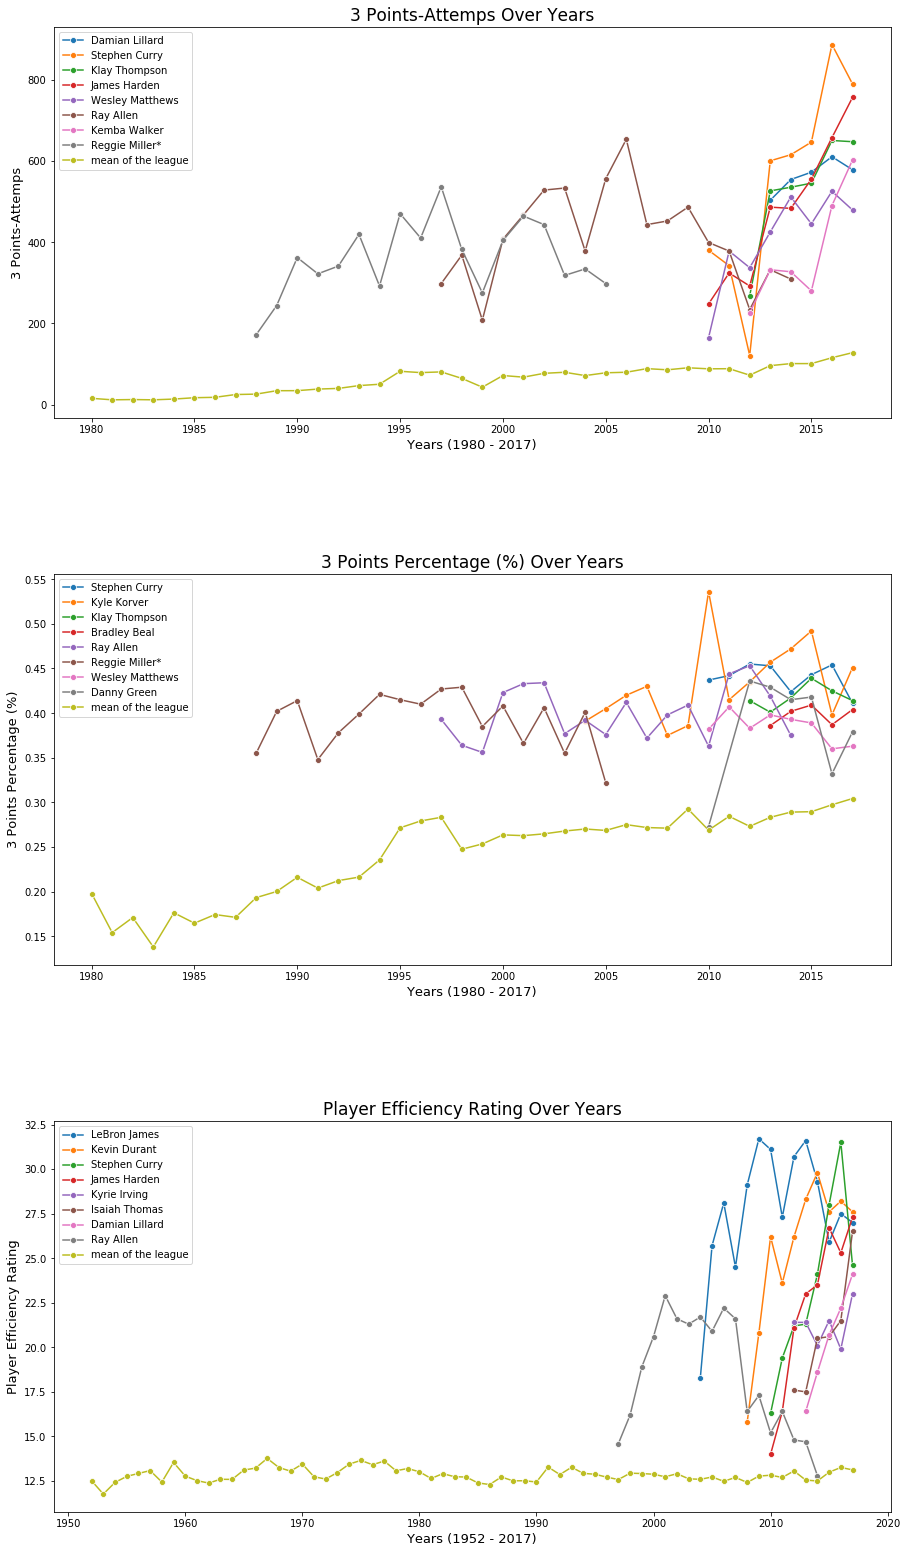

In [28]:
nb_top_n_players = 8
stats_features = ['3PA', '3P%', 'PER']

fig, ax = plt.subplots(len(stats_features), 1, figsize=(15,len(stats_features)*25))

# LINEPLOT OF TOP PLAYERS IN THE CRITERIA    
for idx,feat in enumerate(stats_features):
    # TOP 3P PLAYERS OF NBA HISTORY
    top_players_nba_3 = list(players_season_stats.groupby(['Player']).mean().sort_values(feat, ascending=False).index)
    
    # ENSURING THAT THE TOP PLAYERS DID ENOUGH ATTEMPTS OVER 4 SEASONS
    removed_items = []
    for name in top_players_nba_3:
        if ( (len(players_season_stats[players_season_stats['Player'] == name][feat]) < 4)
            # OUR MINIMUM OF ATTEMPTS IS 300
            or (players_season_stats[players_season_stats['Player'] == name]['3PA'].mean() < 300)
            or (pd.isnull(players_season_stats[players_season_stats['Player'] == name]['3PA'].mean()))):

            removed_items.append(name)
    top_players_nba_3 = list(np.array(top_players_nba_3)[~np.in1d(top_players_nba_3, removed_items)])[:nb_top_n_players]
    #print("Feat: {}, Player: {}".format(feat,top_players_nba_3))
    # LINEPLOT '3P' FOR TOP PLAYERS
    for name in top_players_nba_3:
        stats_player_df = players_season_stats[players_season_stats['Player'] == name]
        
        stats_player_3 = [stats_player_df.loc[stats_player_df[stats_player_df['Year'] == x].index, feat].values[0] for x in list(stats_player_df['Year'].values)]
        ax[idx] = sns.lineplot(y=stats_player_3, x=list(stats_player_df['Year'].values), marker="o", label=name, ax=ax[idx])
        
        ax[idx].set_xlabel('Years ('+ str(list(stats_groupby_year[~stats_groupby_year[feat].isnull()].index)[0]) + ' - ' + str(list(stats_groupby_year[~stats_groupby_year[feat].isnull()].index)[-1]) + ')', size = 13)

    # MEAN OF THE LEAGUE
    ax[idx] = sns.lineplot(y=feat, x=stats_groupby_year_index, data=stats_groupby_year, marker="o", ax=ax[idx], label='mean of the league')

    # PLOT OPTIONS
    ax[idx].set_ylabel(find_title_from_crit(feat), size = 13)
    ax[idx].set_title(find_title_from_crit(feat) + " Over Years", size = 17)

# PLOTTING POSITIONS
plt.subplots_adjust(hspace = 0.4,top = 0.4)

- most of the top 3-point Shooters in Attempts are from the last decade. It proves once again the evolution of the game towards the long distance shooting.
- Ray Allen and Reggie Miller seem to be the precursor of this style of play (the only players, except Kyle Korver not from the last decade) and that's also one between many reasons why they are considered within the best shooters.
- Stephen Curry leads the ranking from attemps and has a very high % of conversion (rank 2, after Kyle Korver).
- Last but not least, even if he shoots a lot from far, his Efficient Rating remains to the top level.

Ray Allen and Reggie Miller might have started to introduce the 3-point game but Curry brought it to another level with crazy high numbers in attempt and in percentage conversion. More than him alone, the whole team Golden State Warriors made the 3-point Shooting as basis of their play. In fact, another shooter in the discussion is Klay Thompson who is Stephen Curry's team player.

As a leader, Stephen Curry brought the Point Guard to the most important role in NBA, as a playmaker but as a Shooter too. More and more players join the NBA playing these positions with a high trend to shoot from far (cf previous analysis).

#### "Michael Jordan is the GOAT (Greatest Of All Time)"

It could be interesting to check the All-Time leaders in some categories to understand who might be the GOAT. Of course, aspects out of statistics are not taken in consideration (such as being clutch, ...), which might biase the results.

In [29]:
# ADDING ADDITIONNAL FEATURES TO THE BEST PLAYERS
add_feats = ['MVP', 'MVP_Finals', 'Finals', 'Titles', 'eTitle', 'eAllStar']
dict_add_feat = {
    'LeBron James': {add_feats[0]: 4, add_feats[1]: 3, add_feats[2]: 8, add_feats[3]: 3, add_feats[4]: 3/8,  add_feats[5]: 13/15},
    'Michael Jordan*': {add_feats[0]: 5, add_feats[1]: 6, add_feats[2]: 6, add_feats[3]: 6, add_feats[4]: 6/6,  add_feats[5]:14/17},
    'Kareem Abdul-Jabbar*': {add_feats[0]: 6, add_feats[1]: 2, add_feats[2]: 10, add_feats[3]: 6, add_feats[4]: 6/10,  add_feats[5]:19/20},
    'Magic Johnson*': {add_feats[0]: 3, add_feats[1]: 3, add_feats[2]: 9, add_feats[3]: 5, add_feats[4]: 5/9,  add_feats[5]:12/13},
    'Larry Bird*': {add_feats[0]: 3, add_feats[1]: 2, add_feats[2]: 5, add_feats[3]: 3, add_feats[4]: 3/5,  add_feats[5]:12/13},
    'Bill Russell*': {add_feats[0]: 5, add_feats[1]: 11, add_feats[2]: 12, add_feats[3]: 11, add_feats[4]: 11/12,  add_feats[5]:12/13},
    'Wilt Chamberlain*': {add_feats[0]: 4, add_feats[1]: 2, add_feats[2]: 6, add_feats[3]: 2, add_feats[4]: 2/6,  add_feats[5]:13/15},
    'Stephen Curry': {add_feats[0]: 2, add_feats[1]: 0, add_feats[2]: 3, add_feats[3]: 2, add_feats[4]: 2/3,  add_feats[5]:6/9},
    'Kobe Bryant': {add_feats[0]: 1, add_feats[1]: 2, add_feats[2]: 7, add_feats[3]: 5, add_feats[4]: 5/7,  add_feats[5]:18/20},
    'Karl Malone*': {add_feats[0]: 2, add_feats[1]: 0, add_feats[2]: 2, add_feats[3]: 0, add_feats[4]: 0/7,  add_feats[5]:14/19},
    'David Robinson*': {add_feats[0]: 1, add_feats[1]: 0, add_feats[2]: 2, add_feats[3]: 2, add_feats[4]: 2/2,  add_feats[5]:10/14},
    'Tim Duncan': {add_feats[0]: 2, add_feats[1]: 3, add_feats[2]: 6, add_feats[3]: 5, add_feats[4]: 5/6,  add_feats[5]:15/20},
    'Hakeem Olajuwon*': {add_feats[0]: 1, add_feats[1]: 2, add_feats[2]: 8, add_feats[3]: 2, add_feats[4]: 2/8,  add_feats[5]:12/18}, 
    "Shaquille O'Neal*": {add_feats[0]: 1, add_feats[1]: 3, add_feats[2]: 6, add_feats[3]: 4, add_feats[4]: 4/6,  add_feats[5]:15/19}, 
}

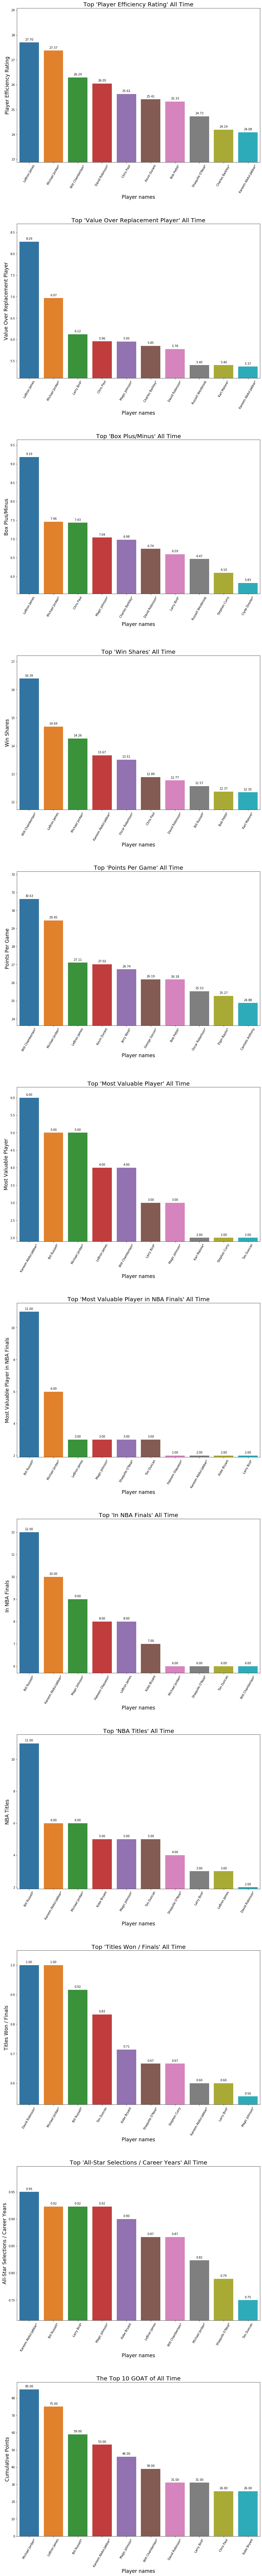

In [30]:
nb_top_n_players = 10
stats_goat = ['PER', 'VORP', 'BPM', 'WS', 'PPG']
stats_goat.extend(add_feats)

fig, ax = plt.subplots(len(stats_goat)+1, 1, figsize=(15,len(stats_goat)*40))

# GROUPBY PLAYER
season_stats_groupedby_player = players_season_stats.groupby(['Player']).mean()

# ADDING THE ADDITIONNAL FEATURES
for feat in add_feats:
    players_season_stats[feat] = 0
    
for name in dict_add_feat.keys():
    dic_values = dict_add_feat[name]
    for key in dic_values.keys():
        season_stats_groupedby_player.loc[name, key] = dic_values[key] 

top_rank = {}
# BARPLOT OF TOP PLAYERS IN THE CRITERIA 
for idx,feat in enumerate(stats_goat):
    # TOP PLAYERS OF NBA HISTORY 
    top_players_nba = list(season_stats_groupedby_player.sort_values(feat, ascending=False).index)
    
    # ENSURING THAT THE TOP PLAYERS DID ENOUGH SEASONS
    removed_items = []
    for i,name in enumerate(top_players_nba):
        if (len(players_season_stats[players_season_stats['Player'] == name][feat]) < 8):
            removed_items.append(name)
    top_players_nba = list(np.array(top_players_nba)[~np.in1d(top_players_nba, removed_items)])[:nb_top_n_players]
    top_players_nba = [x for x in top_players_nba if x != 'nan']
    del i, name
    
    # ATTRIBUTING POINTS BASED ON THE RANK IN FEATURE
    for i,name in enumerate(top_players_nba):
        if name in top_rank and not (top_rank[name] is None):
            top_rank[name] += len(top_players_nba) - i
            #print("Adding: {}".format(top_rank[name]))
        else:
            top_rank[name] = len(top_players_nba) - i
            #print("New: {}".format(top_rank[name]))
    # BARPLOT FOR TOP PLAYERS
    stats_players = [season_stats_groupedby_player.loc[name,feat] for name in top_players_nba]
    
    # BARPLOT
    ax[idx] = sns.barplot(y=stats_players, x=top_players_nba, estimator=max, ci=None, ax=ax[idx])
    ax[idx].set_xticklabels(top_players_nba,rotation=60)
    ax[idx].set_xlabel('Player names', size = 17)
    ax[idx].set_ylabel(find_title_from_crit(feat), size = 17)

    # ANNOTATING VALUES TO BARS
    for p in ax[idx].patches:
        ax[idx].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

    # SET SPECIFIC PARAMETERS TO EACH LINEPLOT   
    ax[idx].set(ylim=[stats_players[-1]-(5*stats_players[-1]/100), stats_players[0]+(5*stats_players[0]/100)]) 
    
    # PLOT TITLE
    ax[idx].set_title("Top '" + find_title_from_crit(feat) + "' All Time", size = 20)

# SORTING DICTIONNARY 
top_rank_df = pd.DataFrame(sorted(top_rank.items(), key=lambda x: x[1], reverse=True), columns=['Player','Score']).head(nb_top_n_players)

# BARPLOT OF SCORES FROM BEST PLAYERS
ax[len(stats_goat)] = sns.barplot(y='Score', x='Player', data=top_rank_df, estimator=max, ci=None, ax=ax[len(stats_goat)])
ax[len(stats_goat)].set_xticklabels(list(top_rank_df['Player'].values),rotation=60)
ax[len(stats_goat)].set_xlabel('Player names', size = 17)
ax[len(stats_goat)].set_ylabel("Cumulative Points", size = 17) 
ax[len(stats_goat)].set_title("The Top 10 GOAT of All Time", size = 20)

# ANNOTATING VALUES TO BARS
for p in ax[len(stats_goat)].patches:
    ax[len(stats_goat)].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


# PLOTTING POSITIONS
plt.subplots_adjust(hspace = 0.4,top = 0.4)

- it is interesting to notice that it exists a real gap between Michael Jordan / LeBron James and the rest of the top 10 players. Today, a discussion about the GOAT really exists between both of them.
- Only a selection of Statistics variables were taken in consideration. Chris Paul should not be in the top 10 of the GOAT. Even though he has no personal awards, he is known to be one of the best playmaker / game organizer of All-Time (his nickname is Point God, from Point Guard). Therefore, his contribution to the success of his team is important. 
- On the contrary, Tim Duncan or even Shaquille O'Neal should be included in the top 10 (observations by many experts).